#### Copyright 2019 Google LLC.

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Classification with scikit-learn

It's time to take what we've learned about the concepts of classification and see how software tools help us to accomplish this task using software.
For this Colab, we will be using a Python library called Scikit-learn. Scikit-learn is a Machine-Learning library for Python built on top of numpy that provides a
lot of functionality for classification, regression, clustering and many other Machine-Learning tasks.

Even just in the context of classification, it provides many different standard algorithms to perform that task such as Nearest Neighbors, Decision Tree, Naive Bayes
and many others. This [page](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py)
provides a complete list and shows some interesting visualizations of how the different classification algorithms compare on three small datasets.

## Overview

### Learning Objectives

* Create a classification model with scikit-learn.
* Use scikit-learn to make classification predictions.

### Prerequisites

* Introduction to Colab
* Intermediate Python
* Intermediate Pandas
* Visualizations
* Introduction to scikit-learn
* Classification

### Estimated Duration

60 minutes

### Grading Criteria

Each exercise is worth 3 points. The rubric for calculating those points is:

| Points | Description |
|--------|-------------|
| 0      | No attempt at exercise |
| 1      | Attempted exercise, but code does not run |
| 2      | Attempted exercise, code runs, but produces incorrect answer |
| 3      | Exercise completed successfully |

There is 1 exercise in this Colab so there are 3 points available. The grading scale will be 3 points.

## The Dataset

Let's take a look at how to use Scikit-Learn to classify some data.

### The Iris data set
For this example, we will be using the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). This is a data set that was used in 1936 by British biologist and statistician Ronald Fisher to classify these flowers into one of three species of iris based on 4 measurements:
- The length of the petals
- The width of the petals
- The length of the sepals (the green petal-looking bits that are found at the base of the petals
- The width of the sepals

![Iris](https://upload.wikimedia.org/wikipedia/commons/2/21/Blue_Iris.JPG)

Conveniently, the iris data set is built-in to the Scikit-learn library so it is readily available to us. Let's take a look:

In [2]:
from sklearn import datasets

iris_bunch = datasets.load_iris()
iris_bunch

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Scikit-learn datasets are usually delivered in the form of a dictionary-like object called a `Bunch`. This `Bunch` contains the following fields:

- *DESCR*: A string describing the dataset
- *data*: An array containing the features we are using for classifying. In this case, the four measurements listed above for each of 150 plants
- *feature_names*: Labels for the data
- *filename*: the file that this data came from
- *target*: the values that we are trying to classify these flowers into. In this case, since we are dealing with three species of iris, we use three numbers 0, 1 and 2 to identify each specie.
- *target_names*: labels for the target values. In this case, 0 refers to the setosa specie, 1 to the versicolor specie and 2 to the virginica species.

So that we don't get our species crossed, let us first create some named variables for each target.

In [3]:
SETOSA = 0
VERSICOLOR = 1
VIRGINICA = 2

We'll also create a list of columns that we'll use for our model.

In [4]:
FEATURES = iris_bunch['feature_names']

Next we will load the feature and target data into a Pandas dataframe.

In [5]:
import pandas as pd

iris_df = pd.DataFrame(iris_bunch['data'], columns=FEATURES)
iris_df['species'] = iris_bunch['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


Let's take a look at a description of the data.

In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


There are 150 data points. No columns seem to be missing data and no values seem to be too far out of expected ranges. For example, there are no zero or negative lengths or widths and the length and width values fall well within what we'd expect for a tulip.

We are interested in using the measurement features to predict iris specie. Let's take a closer look at the values we'll be predicting.

In this case we'll group by our 'species' feature and get a count of each species in our dataset.

In [7]:
iris_df.groupby('species').agg('count')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


So we have 50 examples of each kind of iris. When we go to do a train/test split, we could rely on a random split, but that would lead to some cases where a type of iris never made it into the test set or that a type of iris was very over or under represented in one of the sets.

Instead of relying on pure randomness in our split, we will perform a **stratified** split. This allows us to randomly split the data while keeping the ratio or iris types equivalent in each dataset.

In [8]:
from sklearn.model_selection import train_test_split

train, test  = train_test_split(
  iris_df,                      # split our iris dataframe
  stratify=iris_df['species'],  # stratify by the species column   
  test_size=0.2,                # 20% of the data should be held for testing
  random_state=42               # hard-coded random state for repeatability in the example
)

We can now verify that the test set has roughly the same count of each type of iris.

In [9]:
test.groupby('species').agg('count')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
0,10,10,10,10
1,10,10,10,10
2,10,10,10,10


As does the training set.

In [10]:
train.groupby('species').agg('count')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
0,40,40,40,40
1,40,40,40,40
2,40,40,40,40


## Training a binary classifier

Now that our data is prepared, our first classification task will be to create a classifier that distinguishes versicolor irises from the rest. In other words, rather than considering three classes of outcome (one for each species), we'll just care about two: "versicolor" and "not versicolor". This makes our classifier a binary classifier. This also requires us to use a different target than the one supplied with the data set.

We will add an 'is_versicolor' column to our training and testing data. This new column will be the target for our binary classifier.

In [11]:
import numpy as np

train = train.assign(is_versicolor=train['species'] == VERSICOLOR)
test = test.assign(is_versicolor=test['species'] == VERSICOLOR)

train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_versicolor
8,4.4,2.9,1.4,0.2,0,False
106,4.9,2.5,4.5,1.7,2,False
76,6.8,2.8,4.8,1.4,1,True
9,4.9,3.1,1.5,0.1,0,False
89,5.5,2.5,4.0,1.3,1,True


At this point, we could use several of Scikit-Learn's classifiers to classify our data but let's start with the [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) classifier, using the `SGDClassifier` class.

In [12]:
from sklearn import linear_model

binary_classifier = linear_model.SGDClassifier(
  random_state=2, # Specifying random state allow us to get repeatable outcomes
  tol=1e-3, 
  max_iter=500) 
 
binary_classifier.fit(train[FEATURES], train['is_versicolor'])

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=2, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

So how well did we do? Let's take a look at a test iris that we know is versicolor and see if we can correctly predict the class.

In [13]:
# Grab the first versicolor flower in our test dataset.
flower = test[test['is_versicolor']].iloc[0]

# Predict if that flower is a versicolor flower or not.
binary_classifier.predict([flower[FEATURES]])

array([False])

So the classifier is able to identify this test flower as versicolor (True) but how can we evaluate how good our classifier is?

## Evaluating our classifier

One way to measure the accuracy of our classifier is to use cross-validation.
Scikit-Learn makes that easy for us to do by providing the `cross_val_score` function:

In [14]:
from sklearn import model_selection

model_selection.cross_val_score(
  binary_classifier, 
  test[FEATURES],
  test['is_versicolor'],
  cv=3,
  scoring="accuracy"
)

array([0.72727273, 0.7       , 0.55555556])

63-70% seems like a pretty good result for our classifier. But it's not. Keep in mind that 66.6% of the flowers are not versicolor so a model that always predict False would get pretty close!

It's important to remember when you're dealing with data that isn't evenly split between the classes that accuracy needs to factor in the distribution data. 

A classic example of this would be a medical test to detect a rare disease. A test that always returned False would be correct a high percentage of the time but completely fail to meet its purpose. See an illustration of this principle in [this article](https://www.scientificamerican.com/article/what-is-bayess-theorem-an/).

### Confusion matrix

To look at how well our model is really doing, we need to consider the number of items that we correctly identify as being part of our class (true positives) or out of our class (true negatives) as well as the number that incorrectly identify as part of our class (false positives) and incorrectly identify as not part of our class (false negatives).

A confusion matrix for a binary classifier is a matrix made up of those four values:

<table>
<tr><td>True negatives<td>False positives</tr>
<tr><td>False negatives<td>True positives</tr>
</table>

Scikit-Learn makes it easy to get this matrix:

In [15]:
from sklearn import metrics

predictions = model_selection.cross_val_predict(
  binary_classifier,
  test[FEATURES],
  test['is_versicolor'],
  cv=3
)

metrics.confusion_matrix(test['is_versicolor'], predictions)

array([[13,  7],
       [ 3,  7]])

This matrix represents the behavior of our classifier:
- Each row represents an actual class. In this case, the first row represents the 20 flowers that are not versicolor, the second represents the 10 flowers that are.
- Each column represents a predicted class. In this case, the first column represents the 17 flowers that our classifier identified as not versicolor and  the second column represents the 3 flowers that were identified as versicolor

We can then use these values to analyze our model. Two metrics that are commonly used to summarize the behavior of a classifier are precision (percentage of identified positives that are correct) and recall (percentage of positives that are correctly identified)

Scikit-Learn also allows us to extract those values directly without going through the confusion matrix:

In [16]:
precision = metrics.precision_score(test['is_versicolor'], predictions)
recall = metrics.recall_score(test['is_versicolor'], predictions)

print("Precision: {}\nRecall: {}".format(precision, recall))

Precision: 0.5
Recall: 0.7


Our model isn't looking so good anymore! 

We can try to increase precision or recall by adjusting the threshold that our classifier uses to determine whether an item belongs in a class. The classifier computes a value for each item in our data set and items that correspond to a value over the threshold are deemed to be in the class and those below the threshold are deemed not in the class. 

For example, if we use our test data we can get the scores that our classifier assigned to each flower:

In [17]:
# What scores does or model generate?
scores = binary_classifier.decision_function(test[FEATURES])

# What predictions are made?
predictions = binary_classifier.predict(test[FEATURES])

# What is the actual value that should have been predicted?
actuals = test['is_versicolor']

# Store everything in a DataFrame
df = pd.DataFrame({
  'Scores': scores,
  'Predictions': predictions,
  'Actuals': actuals
})

# Output the data sorted by score
df[['Scores', 'Predictions', 'Actuals']].sort_values(by=['Scores'])

,Scores,Predictions,Actuals
14,-165.475368,False,False
141,-151.946638,False,False
140,-146.581511,False,False
22,-142.789492,False,False
18,-141.514447,False,False
10,-131.181610,False,False
56,-120.037381,False,True
147,-113.695272,False,False
104,-113.430327,False,False
138,-110.466260,False,False


By default, Scikit-Learn uses a threshold of 0 so any flower that scores > 0 is going to be deemed part of versicolor.

We can affect the decisions that the classifier is making by setting our own value for threshold.

Scikit-Learn does not allow us to specify a different threshold when training the classifier but we can use the output of `decision_function` to make our own prediction with our own threshold:

In [18]:
threshold = 55
predictions = (scores > threshold)
predictions

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

It's hard to tell if we're doing better since the samples are scrambled so we go back to precision and recall: 

In [19]:
precision = metrics.precision_score(test['is_versicolor'], predictions)
recall = metrics.recall_score(test['is_versicolor'], predictions)

print("Precision: {}\nRecall: {}".format(precision, recall))

Precision: 0.0
Recall: 0.0


/Users/dorishuang/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


By lowering the threshold, we've improved the recall but lost some precision in our model. 
This is the usual trade-off when tweaking the threshold that we are using. We can visualize this trade-off by using the `precision_recall_curve` function which tries many different thresholds allowing us to plot the result:

In [20]:
import matplotlib
import matplotlib.pyplot as plt

scores = model_selection.cross_val_predict(
  binary_classifier, 
  test[FEATURES],
  test['is_versicolor'],
  cv=3,
  method="decision_function"
)
precisions, recalls, thresholds = metrics.precision_recall_curve(
  test['is_versicolor'],
  scores
)

plt.plot(thresholds, precisions[:-1], "g--", label="Precision")
plt.plot(thresholds, recalls[:-1], "r-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper right")
plt.show()

<Figure size 640x480 with 1 Axes>

This is (roughly) the kind of shape that we expect from this graph: as we increase the threshold, precision improves but recall drops. With a large dataset, this trend continues until precision reaches 100% and recall drops to 0.  But in this case, the data set is small enough that the overall graph looks strange when we zoom out.

We see that raising the threshold ends up hurting precision as well as recall because a few incorrectly labelled flowers end up significantly hurting our metric.

Another graph that we can use to evaluate our binary classifier is the _receiver operating characteristic_ (ROC) curve. This is a complex name for a relatively simple concept, the curve  plots the true positive rate (TPR which is just recall) against the false positive rate (FPR) for various threshold values. FPR is just (1 - the true negative rate). 

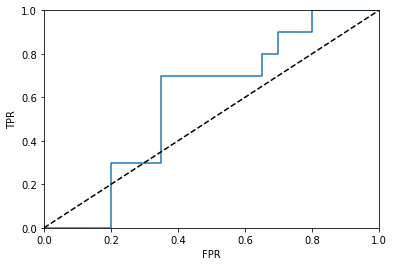

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(test['is_versicolor'], scores)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

The dotted line in this graph represents the behavior of a purely random classifier. The blue line represents the behavior of our classifier. The furthest away from the dotted line that our blue line is, the better our classifier. We can represent this "furthest away" concept numerically by measuring the area under the curve (AUC) using Scikit-Learn's built-in function:

In [22]:
metrics.roc_auc_score(test['is_versicolor'], scores)

0.585

A ROC AUC score of 1 indicates a perfect classifier, a score of 0.5 is equivalent to a random classifier.

## Classifying into multiple classes

Often times, we are not just classifying into two classes (nails vs. screws or versicolor vs. not) but into multiple classes (nails vs. screws vs. bolts or the various types of irises). Since our dataset considers three different species of flowers, it would be great to be able to predict which species a flower belongs to.

Random Forest classifiers and Naive Bayes classifiers are able to handle multiple classes directly but others (like our SGD classifier) are not able to do so. Instead, we must use multiple binary classifiers to break up our data into more than two classes.

One way to do is to create one classifier like the one that we created earlier (versicolor vs. not) for each class that we want to support. In this case, it would mean 3 classifiers:
- setosa vs. not
- versicolor vs. not
- virginica vs. not

Determining the class for a test case is then a matter of running all three classifiers and selecting the one that gives the strongest positive score. This is called the one-versus-all (OvA) strategy.

Alternatively, we could train a classifier to distinguish between every pair of classes that we are trying to classify our data into. This is called the one-versus-one (OvO) strategy. In our case, it would mean 3 classifiers again:
- setosa vs. versicolor
- setosa vs. virginica
- versicolor vs. virginica

Although we end up with the same number of classifier in our case of dealing with 3 classes, this is not the case when dealing with more classes. As the number of classes grows, the number of classifiers for OvO grows much more rapidly (O(n^2)) than OvA (O(n)). On the other hand, each classifier for OvO only requires the data from the two classes that it is considering in order to be built whereas each classifier for OvA must consider all the training data.

Luckily, Scikit-Learn hides a lot of the complexity from us. In the case of our SGD classifier, it automatically detects that we are trying to do multiclass classification and uses the OvA strategy to create multiple classifiers for us and present us with the result of comparing the outcome of the 3 classifiers.

In [23]:
multi_class_classifier = linear_model.SGDClassifier(random_state=1701, tol=1e-3)  
multi_class_classifier.fit(train[FEATURES], train['species'])   # We're not using training_target_is_versicolor anymore
multi_class_classifier.predict([flower[FEATURES]])

array([1])

The output is no longer a True/False value but a number representing the class that `flower` is predicted to be, in this case, 1 which indicates versicolor.

We can pull back the curtain on what `SGDClassifier` is doing for us behind the scenes by using `decision_function`:

In [24]:
  multi_class_classifier.decision_function([flower[FEATURES]])

array([[ -29.39300012,   -1.43583729, -146.22923439]])

This array represents the three scores that the three binary classifiers gave `flower`. Clearly, number 1 was the strongest score so `flower` was identified as versicolor.

We can now evaluate the accuracy of this new classifier:

In [25]:
model_selection.cross_val_score(multi_class_classifier, test[FEATURES], test['species'], cv=3, scoring="accuracy")

array([0.66666667, 0.66666667, 0.66666667])

This is looking more promising than before. Although our odds of being randomly right have dropped to 33%, our model is able to predict the species of a flower with 66% accuracy.

We can now compare that to how a Naive Bayes classifier would do:

In [26]:
from sklearn import naive_bayes

nb_classifier = naive_bayes.GaussianNB()
nb_classifier.fit(train[FEATURES], train['species'])

model_selection.cross_val_score(
  nb_classifier,
  train[FEATURES],
  train['species'],
  cv=3,
  scoring="accuracy"
)

array([0.92857143, 0.97435897, 0.97435897])

So it looks like a Naive Bayes classifier would do better for us for this data set.

# Exercises

In these exercises we will use another sample dataset provided by Scikit Learn. This dataset contain examples of handwritten digits. We'll create a binary classifier that determines if the digit we are provided is less than or equal to three.

In order to do this we'll need to:

1. Load the dataset from Scikit Learn.
1. Convert the data from a `Bunch` to a `DataFrame`.
1. Create a synthetic column that contains the value `True` if the digit is less than or equal to three and `False` otherwise.
1. Split the data into a train and test set, stratifying by digit.
1. Train an SGDClassifier.
1. Graph precision vs. recall.
1. Create custom predictions with our own hand-selected threshold.

## Exercise 1: Load the data

Scikit Learn has a built in dataset of handwritten digits. Look at the [load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) documentation and write code below to load the digits bunch into memory.

### Student Solution

In [27]:
from sklearn import datasets

digits_bunch =datasets.load_digits()
digits_bunch

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

## Exercise 2: Convert the Bunch to a Data Frame

Though it isn't strictly necessary, we have been using Pandas DataFrames throughout most of our machine learning experience so far. To keep things consistent, write code below to create a Pandas DataFrame containing 65 columns of data. The first 64 columns are the pixel intensities for the images. The columns will be named '0' through '63'. Then add in a column called 'digit' that contains the target value for each row.

### Student Solution

In [28]:
import pandas as pd

FEATURES = [x for x in range(64)]

digits = pd.DataFrame(digits_bunch['data'], columns=FEATURES)
digits['digit'] = digits_bunch['target']
digits


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,digit
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9


## Exercise 3: Create a Synthetic Column

Use the `assign` function to create a synthetic column called 'lt_eq_3' that contains `True` values if the target digit is three or less and `False` otherwise.

### Student Solution

In [29]:
digits = digits.assign(lt_eq_3 = digits['digit']<=3)
digits

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,digit,lt_eq_3
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,True
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,True
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,True
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,True
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,False
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5,False
6,0.0,0.0,0.0,12.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,9.0,15.0,11.0,3.0,0.0,6,False
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7,False
8,0.0,0.0,9.0,14.0,8.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,11.0,16.0,15.0,11.0,1.0,0.0,8,False
9,0.0,0.0,11.0,12.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,9.0,12.0,13.0,3.0,0.0,0.0,9,False


## Exercise 4: Split the Data

Use `train_test_split` to split 20% of the digits data off for testing. Stratify by digit so that you get a representative sample from the data.

### Student Solution

In [30]:
from sklearn.model_selection import train_test_split

train, test  = train_test_split(
  digits,                     
  stratify=digits['digit'],  
  test_size=0.2,              
)


## Exercise 5: Create and Fit a Binary Classifier

Create an instance of the `SGDClassifer`. Train the classifier on features '0' through '63' and target the 'lt_eq_3' column created earlier.

### Student Solution

In [31]:
from sklearn import linear_model

binary_classifier = linear_model.SGDClassifier(
  random_state=2, # Specifying random state allow us to get repeatable outcomes
  tol=1e-3, 
  max_iter=500) 
 
binary_classifier.fit(train[FEATURES], train['lt_eq_3'])

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=2, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

## Exercise 6: Get Scores

Use the `cross_val_predict` to get scores for the test data.

### Student Solution

In [32]:
from sklearn import model_selection
scores = model_selection.cross_val_predict(
  binary_classifier, 
  digits[FEATURES],
  digits['lt_eq_3'],
  cv=3,
  method="decision_function"
)


## Exercise 7: Get Precision, Recall, and Thresholds

Use `precision_recall_curve` to get precisions, recalls, and thresholds for the test data.

### Student Solution

In [33]:
# Your code goes here
precisions, recalls, thresholds = metrics.precision_recall_curve(
  digits['lt_eq_3'],
  scores
)
precisions, recalls, thresholds

(array([0.44171779, 0.44137508, 0.44164619, ..., 1.        , 1.        ,
        1.        ]),
 array([1.        , 0.99861111, 0.99861111, ..., 0.00277778, 0.00138889,
        0.        ]),
 array([-1588.10667182, -1587.3019417 , -1587.02215098, ...,
         3920.9378949 ,  3940.01123738,  4101.96248851]))

## Exercise 8: Plot the Precision Recall Curve

Use Matplotlib to plot the precision recall curve.

### Student Solution

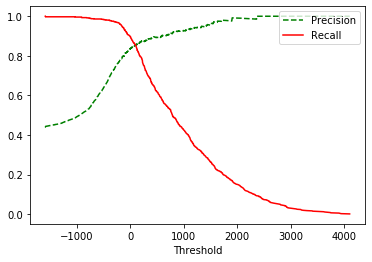

In [34]:
import matplotlib
import matplotlib.pyplot as plt

plt.plot(thresholds, precisions[:-1], "g--", label="Precision")
plt.plot(thresholds, recalls[:-1], "r-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper right")
plt.show()

## Exercise 9: Make New Predictions

Eyeballing the graph produced above, use a custom threshold to make new predictions.

### Student Solution

In [35]:
threshold = 250 # Change to a better thresold
predictions = (scores > threshold)
predictions

array([ True,  True,  True, ..., False, False, False])

## Exercise 10: Output New Precision and Recall

Based on your new predictions use `precision_score` and `recall_score` to print out the new precision and recall.

### Student Solution

In [36]:
precision = metrics.precision_score(digits['lt_eq_3'], predictions)
recall = metrics.recall_score(digits['lt_eq_3'], predictions)

print("Precision: {}\nRecall: {}".format(precision, recall))

Precision: 0.8725806451612903
Recall: 0.7513888888888889


## Exercise 11: Multiclass Classifier

Create and fit a multiclass classifier to attempt to distinguish each digit from each other from 0 to 9.

Report its cross-value score for accuracy.

### Student Solution

In [37]:
# Naive_bayes
from sklearn import naive_bayes
multi_class_digit_classifier = naive_bayes.GaussianNB()
nb_classifier.fit(train[FEATURES], train['digit'])

cross_value_scores = model_selection.cross_val_score(
  multi_class_digit_classifier,
  digits[FEATURES],
  digits['digit'],
  cv=3,
  scoring="accuracy",)
        
cross_value_scores

array([0.82392027, 0.79966611, 0.83221477])

In [38]:
# SGDClassifier
multi_class_digit_classifier = linear_model.SGDClassifier(tol=1e-3)  
multi_class_digit_classifier.fit(train[FEATURES], train['digit'])  

cross_value_scores = model_selection.cross_val_score(multi_class_digit_classifier, 
                                digits[FEATURES], digits['digit'], 
                                cv=3, scoring="accuracy")
cross_value_scores

array([0.8986711 , 0.95325543, 0.89932886])

## Exercise 12: Challenge (Ungraded) 

As an optional exercise, try 4 different binary classifiers of your choice for the  "less than or equal to 3" or "greater than 3" problem. Graph the ROC curve for all 4 classifiers on the same plot to compare them.

### Student Solution

In [39]:
# Your code goes here.
from sklearn.tree import DecisionTreeClassifier

multi_class_digit_classifier_tree = DecisionTreeClassifier(max_depth=2)  
multi_class_digit_classifier_tree.fit(train[FEATURES], train['lt_eq_3']) 

cross_value_scores_tree = model_selection.cross_val_score(multi_class_digit_classifier_tree, 
                                                     digits[FEATURES], digits['lt_eq_3'], 
                                                     cv=3, scoring="accuracy")
cross_value_scores_tree

array([0.74457429, 0.75125209, 0.80801336])

In [40]:
from sklearn.neighbors import KNeighborsClassifier

multi_class_digit_classifier_KNN = KNeighborsClassifier(n_neighbors=2)  
multi_class_digit_classifier_KNN.fit(train[FEATURES], train['lt_eq_3'])

cross_value_scores_KNN = model_selection.cross_val_score(multi_class_digit_classifier_KNN, 
                                                     digits[FEATURES], digits['lt_eq_3'], 
                                                     cv=3, scoring="accuracy")
cross_value_scores_KNN

array([0.95492487, 0.97829716, 0.97495826])

In [41]:
from sklearn.svm import SVC
multi_class_digit_classifier_SVC = SVC(kernel="linear")  
multi_class_digit_classifier_SVC.fit(train[FEATURES], train['lt_eq_3'])  

cross_value_scores_SVC = model_selection.cross_val_score(multi_class_digit_classifier_SVC, 
                                                     digits[FEATURES], digits['lt_eq_3'], 
                                                     cv=3, scoring="accuracy")
cross_value_scores_SVC

array([0.88981636, 0.92654424, 0.86811352])

In [42]:
from sklearn.gaussian_process import GaussianProcessClassifier
multi_class_digit_classifier_GPC = GaussianProcessClassifier()  
multi_class_digit_classifier_GPC.fit(train[FEATURES], train['lt_eq_3']) 

cross_value_scores_GPC = model_selection.cross_val_score(multi_class_digit_classifier_GPC, 
                                                     digits[FEATURES], digits['lt_eq_3'], 
                                                     cv=3, scoring="accuracy")
cross_value_scores_GPC

array([0.97161937, 0.98163606, 0.97829716])

In [43]:
from sklearn.neural_network import MLPClassifier
multi_class_digit_classifier_MLP = MLPClassifier()  
multi_class_digit_classifier_MLP.fit(train[FEATURES], train['lt_eq_3'])  

cross_value_scores_MLP = model_selection.cross_val_score(multi_class_digit_classifier_MLP, 
                                                     digits[FEATURES], digits['lt_eq_3'], 
                                                     cv=3, scoring="accuracy")
cross_value_scores_MLP

array([0.96494157, 0.97829716, 0.97328881])

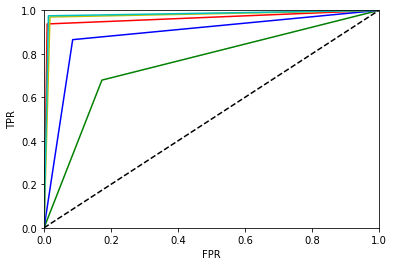

In [44]:
tree_scores = model_selection.cross_val_predict(
    multi_class_digit_classifier_tree,
    digits[FEATURES], 
    digits['lt_eq_3'], 
    cv=3,
)

tree_fpr, tree_tpr, thresholds = metrics.roc_curve(digits['lt_eq_3'], tree_scores)

KNN_scores = model_selection.cross_val_predict(
    multi_class_digit_classifier_KNN,
    digits[FEATURES], 
    digits['lt_eq_3'], 
    cv=3,
)
KNN_fpr, KNN_tpr, thresholds = metrics.roc_curve(digits['lt_eq_3'], KNN_scores)

SVC_scores = model_selection.cross_val_predict(
    multi_class_digit_classifier_SVC,
    digits[FEATURES], 
    digits['lt_eq_3'], 
    cv=3,
)
SVC_fpr, SVC_tpr, thresholds = metrics.roc_curve(digits['lt_eq_3'], SVC_scores)

GPC_scores = model_selection.cross_val_predict(
    multi_class_digit_classifier_GPC,
    digits[FEATURES], 
    digits['lt_eq_3'], 
    cv=3,
)
GPC_fpr, GPC_tpr, thresholds = metrics.roc_curve(digits['lt_eq_3'], GPC_scores)

MLP_scores = model_selection.cross_val_predict(
    multi_class_digit_classifier_MLP,
    digits[FEATURES], 
    digits['lt_eq_3'], 
    cv=3,
)
MLP_fpr, MLP_tpr, thresholds = metrics.roc_curve(digits['lt_eq_3'], MLP_scores)

plt.plot(tree_fpr, tree_tpr,'g-')
plt.plot(KNN_fpr, KNN_tpr,'r-')
plt.plot(SVC_fpr, SVC_tpr,'b-')
plt.plot(GPC_fpr, GPC_tpr,'y-')
plt.plot(MLP_fpr, MLP_tpr,'c-')
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [45]:
from sklearn.neural_network import MLPClassifier
multi_class_digit_classifier_MLP = MLPClassifier()  
multi_class_digit_classifier_MLP.fit(train[FEATURES], train['digit'])  

cross_value_scores_MLP_digit = model_selection.cross_val_score(multi_class_digit_classifier_MLP, 
                                                     digits[FEATURES], digits['digit'], 
                                                     cv=3, scoring="accuracy")
cross_value_scores_MLP_digit

array([0.9269103 , 0.94323873, 0.9295302 ])

In [46]:
from sklearn.neighbors import KNeighborsClassifier

multi_class_digit_classifier_KNN = KNeighborsClassifier(n_neighbors=2)  
multi_class_digit_classifier_KNN.fit(train[FEATURES], train['digit'])

cross_value_scores_KNN_digit = model_selection.cross_val_score(multi_class_digit_classifier_KNN, 
                                                     digits[FEATURES], digits['digit'], 
                                                     cv=3, scoring="accuracy")
cross_value_scores_KNN_digit

array([0.95847176, 0.96327212, 0.9647651 ])